In [ ]:
!sudo apt update
!sudo apt autoremove
!sudo apt upgrade
!sudo apt install python3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,056 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,567 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit

In [ ]:
!python --version

import sys
print("version:", sys.version)

Python 3.8.15
version: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]


In [ ]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 7.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip show pandas

Name: pandas
Version: 1.5.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.8/dist-packages
Requires: pytz, numpy, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, db-dtypes, datascience, cufflinks, cmdstanpy, arviz, altair


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import tensorflow as tf
import random

In [ ]:
import pandas as pd

unpickled_df_train = pd.read_pickle("/content/drive/MyDrive/train100c5k_v2.pkl")
unpickled_df_test = pd.read_pickle("/content/drive/MyDrive/test100c5k_nolabel.pkl")

unpickled_df_train

,data,target
0,"[[46, 132, 11, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,"[[0, 0, 3, 0, 116, 78, 0, 1, 1, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,"[[0, 0, 0, 69, 165, 202, 199, 214, 204, 170, 1...",0
...,...,...
499995,"[[0, 0, 0, 0, 1, 4, 7, 8, 6, 4, 5, 1, 0, 0, 0,...",99
499996,"[[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",99
499997,"[[0, 0, 0, 0, 2, 0, 25, 26, 0, 1, 0, 0, 0, 0, ...",99
499998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",99


In [ ]:
import tensorflow as tf
import random
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import *
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Computing the values for X_train, X_test, Y_train, Y_test
# Reshaping the imags to fit into the model
# Test size has been taken as 20% of train set

X_train, X_test, Y_train, Y_test = train_test_split(unpickled_df_train['data'].values, unpickled_df_train['target'].values, test_size=0.05, random_state=4, stratify=unpickled_df_train['target'].values)
X_train = np.array([x.reshape( 28, 28, 1) for x in X_train])
X_test = np.array([x.reshape( 28, 28, 1) for x in X_test])

In [ ]:
# Reshaping the entire array of X_train, X_test

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,  1).astype('float32')

#Normalization
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape, X_test.shape)


Y_train = to_categorical(Y_train, 100)
Y_test = to_categorical(Y_test, 100)

print(Y_train.shape, Y_test.shape)

(475000, 28, 28, 1) (25000, 28, 28, 1)
(475000, 100) (25000, 100)


In [ ]:
# Training the CNN model

CNN_model = Sequential()
CNN_model.add(tf.keras.layers.Input(shape=(28,28,1)))

# CNN_model.add(tf.keras.layers.RandomRotation(factor=0.5))
CNN_model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'elu' ,kernel_initializer = "he_normal", padding="same"))
CNN_model.add(tf.keras.layers.MaxPooling2D(2,2))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'elu',  kernel_initializer = "he_normal", padding="same"))
CNN_model.add(tf.keras.layers.MaxPooling2D(2,2))
CNN_model.add(tf.keras.layers.BatchNormalization())

CNN_model.add(tf.keras.layers.Conv2D(filters =256 , kernel_size = (3, 3), activation = 'elu', kernel_initializer = "he_normal", padding="same" ))
CNN_model.add(tf.keras.layers.MaxPooling2D(2,2))
CNN_model.add(tf.keras.layers.BatchNormalization())

# CNN_model.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', kernel_initializer = "he_normal", padding="same" ))
# CNN_model.add(tf.keras.layers.MaxPooling2D(2,2))


# CNN_model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

CNN_model.add(tf.keras.layers.GlobalAveragePooling2D())
CNN_model.add(tf.keras.layers.Dense(256, activation='elu', kernel_initializer = "he_normal"))
CNN_model.add(tf.keras.layers.Dropout(0.2))
# CNN_model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
CNN_model.add(tf.keras.layers.Dense(100, activation='softmax'))

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                        

In [ ]:
# Compiling the CNN_model

CNN_model.compile(loss='categorical_crossentropy',optimizer= 'adam', metrics=['accuracy'])


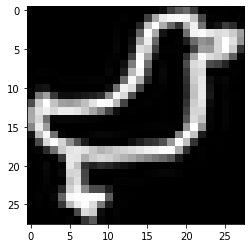

In [ ]:
plt.imshow(X_train[2][:,:,0],cmap="gray")

In [ ]:
CNN_model_fit = CNN_model.fit(X_train, Y_train, batch_size= 64, epochs=50,
verbose=1, validation_data=(X_test, Y_test))
CNN_model.save('model_arnall.h5')

Epoch 1/50
7422/7422 [==============================] - 61s 7ms/step - loss: 1.6739 - accuracy: 0.5766 - val_loss: 1.3687 - val_accuracy: 0.6460
Epoch 2/50
7422/7422 [==============================] - 54s 7ms/step - loss: 1.2610 - accuracy: 0.6707 - val_loss: 1.2084 - val_accuracy: 0.6844
Epoch 3/50
7422/7422 [==============================] - 53s 7ms/step - loss: 1.1535 - accuracy: 0.6963 - val_loss: 1.1497 - val_accuracy: 0.6970
Epoch 4/50
7422/7422 [==============================] - 52s 7ms/step - loss: 1.0892 - accuracy: 0.7110 - val_loss: 1.1305 - val_accuracy: 0.7047
Epoch 5/50
7422/7422 [==============================] - 52s 7ms/step - loss: 1.0392 - accuracy: 0.7228 - val_loss: 1.1103 - val_accuracy: 0.7084
Epoch 6/50
7422/7422 [==============================] - 52s 7ms/step - loss: 1.0010 - accuracy: 0.7314 - val_loss: 1.1242 - val_accuracy: 0.7086
Epoch 7/50
7422/7422 [==============================] - 52s 7ms/step - loss: 0.9710 - accuracy: 0.7380 - val_loss: 1.1045 - val_ac

In [ ]:
!python --version

Python 3.8.15


In [ ]:
np.version.version



'1.21.6'

In [ ]:
pd. __version__

'1.5.2'

In [ ]:
!pip show keras

Name: keras
Version: 2.9.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: cycler, kiwisolver, pyparsing, numpy, python-dateutil
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: scipy, joblib, threadpoolctl, numpy
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.9.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: astunparse, h5py, keras, wrapt, numpy, six, libclang, protobuf, opt-einsum, tensorflow-io-gcs-filesystem, packaging, tensorboard, typing-extensions, keras-preprocessing, setuptools, tensorflow-estimator, absl-py, google-pasta, grpcio, flatbuffers, gast, termcolor
Required-by: kapre
